<a href="https://colab.research.google.com/github/ptfrwrd/EDA_and_Classification/blob/master/Red_wines_EDA_and_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import dataset from kaggle (using kaggle API)**

In [2]:
! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ptfrwrd","key":"4a2f5a982ed53062345976efa42bd4c8"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
! kaggle datasets download -d uciml/red-wine-quality-cortez-et-al-2009

  0% 0.00/25.6k [00:00<?, ?B/s]
100% 25.6k/25.6k [00:00<00:00, 23.0MB/s]


In [5]:
! mkdir data
! unzip red-wine-quality-cortez-et-al-2009.zip -d data

Archive:  red-wine-quality-cortez-et-al-2009.zip
  inflating: data/winequality-red.csv  


**Import base libs:**

In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Look at the data:**

In [7]:
data = pd.read_csv('data/winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**Data describe:**

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

Output variable (based on sensory data):

12 - quality (score between 0 and 10)

Check quality value counts:

[Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8')]

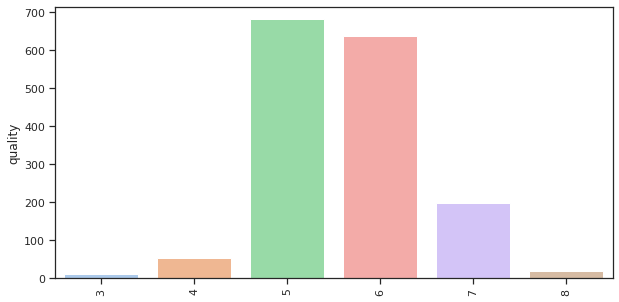

In [54]:
quality =  pd.DataFrame(data.quality.value_counts().sort_values(ascending=False))
plt.figure(figsize=(10,5))
sns.set(style="ticks", palette="pastel")
ax = sns.barplot(x = quality.index, y = 'quality' , data = quality)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

The most popular quality is 5.

In [8]:
# see NaN-values
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Nice, we haven not missing values. Let`s describe the data.

# **Now, do some statistical analysis.**

- Descriptive Statistics;
- Inferential Statistics.

## **Descriptive Statistics**

In this notebook, we will be focussing on three key elements of Descriptive Statistics :

*Measures Of Central Tendency*

- Mean
- Median
- Mode

*Measures Of Spread*

- Outliers
- Interquantile Range

*Dependence*

- Correlation

In [9]:
# we can see for all numerical columns mean and std

data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


* Finding mean is not a good approach as the '**Mean is often affected by Outliers**'.

* To generalize it if the distribution of datasets is skewed(troubled by outliers), we do not choose mean. Here we will have to go for **Median**.

Good median representation is boxplot.

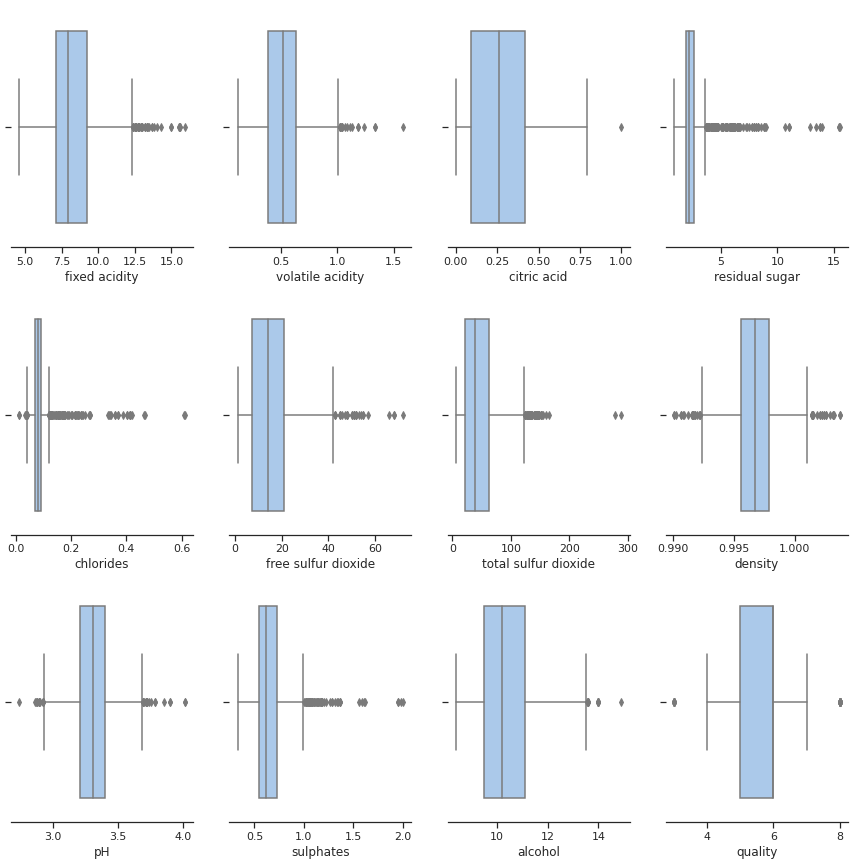

In [23]:
sns.set(style="ticks", palette="pastel")

f, axes = plt.subplots(3, 4, figsize=(15, 15))
sns.despine(left=True)

sns.boxplot(data['fixed acidity'],  ax=axes[0, 0])
sns.boxplot(data['volatile acidity'],  ax=axes[0, 1])
sns.boxplot(data['citric acid'],  ax=axes[0, 2])
sns.boxplot(data['residual sugar'],  ax=axes[0, 3])

sns.boxplot(data['chlorides'],  ax=axes[1, 0])
sns.boxplot(data['free sulfur dioxide'],  ax=axes[1, 1])
sns.boxplot(data['total sulfur dioxide'],  ax=axes[1, 2])
sns.boxplot(data['density'],  ax=axes[1, 3])

sns.boxplot(data['pH'],  ax=axes[2, 0])
sns.boxplot(data['sulphates'],  ax=axes[2, 1])
sns.boxplot(data['alcohol'],  ax=axes[2, 2])
sns.boxplot(data['quality'],  ax=axes[2, 3])

Well, we can see that a lot of features have outliers (it is individual points on plots). 

Let`s take a closer look at 'pH' column, for example.

Compare median and mean.

In [39]:
median = np.median(data['pH'])
mean = np.mean(data['pH'])
mode = data['pH'].mode()[0]
print('pH median: ', median)
print('pH mean: ', mean)
print('pH mode: ', mode)

q1 = data['pH'].quantile(0.25) # lower quartile  } Note: The fuction is .quantile() with 'n'
q3 = data['pH'].quantile(0.75) # upper quartile  }       not .quartile() with 'r'
print("Q1:", q1)
print("Q3:", q3)
print("IQR:", q3 - q1)

pH median:  3.31
pH mean:  3.311113195747343
pH mode:  3.3
Q1: 3.21
Q3: 3.4
IQR: 0.18999999999999995


Median and mean have very close values. May be pH has normal distribution?

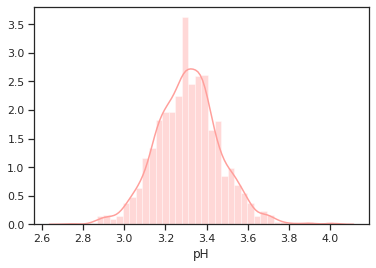

In [35]:
sns.distplot(data['pH'], color='r')

[Text(0.5, 0, '')]

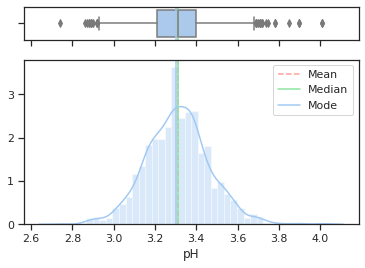

In [40]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})

sns.boxplot(data["pH"], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.distplot(data["pH"], ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')
ax_hist.axvline(mode, color='b', linestyle='-')

plt.legend({'Mean':mean,'Median':median,'Mode':mode})

ax_box.set(xlabel='')

Thus, we see that our Histogram is normal (no skew).

null hypothesis: data['pH'] comes from a normal distribution.

If p_value < 0.05, the null hypothesis can be rejected, else the null hypothesis cannot be rejecte.

In [27]:
from scipy import stats

normal = stats.normaltest(data['pH'])
normal

NormaltestResult(statistic=33.684697471483915, pvalue=4.8468645347727716e-08)

p_value < 0.05, pH does not come from a normal distribution.

Let`s take a closer look at sulphates column, for example.
Do the same sequence of actions.

In [41]:
median = np.median(data['sulphates'])
mean = np.mean(data['sulphates'])
mode = data['sulphates'].mode()[0]
print('sulphates median: ', median)
print('sulphates mean: ', mean)
print('sulphates mode: ', mode)

q1 = data['sulphates'].quantile(0.25) # lower quartile  } Note: The fuction is .quantile() with 'n'
q3 = data['sulphates'].quantile(0.75) # upper quartile  }       not .quartile() with 'r'
print("Q1:", q1)
print("Q3:", q3)
print("IQR:", q3 - q1)

sulphates median:  0.62
sulphates mean:  0.6581488430268921
sulphates mode:  0.6
Q1: 0.55
Q3: 0.73
IQR: 0.17999999999999994


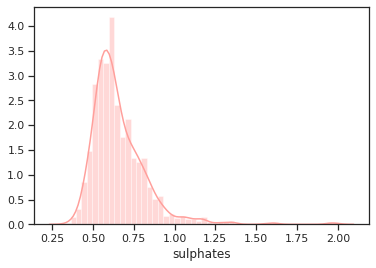

In [42]:
sns.distplot(data['sulphates'], color='r')

[Text(0.5, 0, '')]

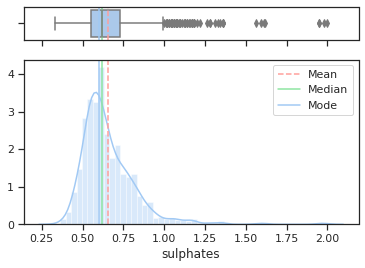

In [43]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})

sns.boxplot(data["sulphates"], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.distplot(data["sulphates"], ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')
ax_hist.axvline(mode, color='b', linestyle='-')

plt.legend({'Mean':mean,'Median':median,'Mode':mode})

ax_box.set(xlabel='')

Thus, we see that our Histogram is "Positively Skewed".

In [33]:
normal = stats.normaltest(data['sulphates'])
normal

NormaltestResult(statistic=906.8944479227036, pvalue=1.1759065222978855e-197)

p_value < 0.05, sulphates does not come from a normal distribution.

**Correlation**

* Now what if we want to know how the price is affected by different factors which are some of the other columns/features in our dataset.
* This is nothing but correlation.

The most popular correlation is Pearson correlation. But we need to keep in mind that this coefficient is very sensitive to outliers.

We can use alternative coefficient - Spearman correlation, it is the same as Pearson, but do not sensitive to outliers.

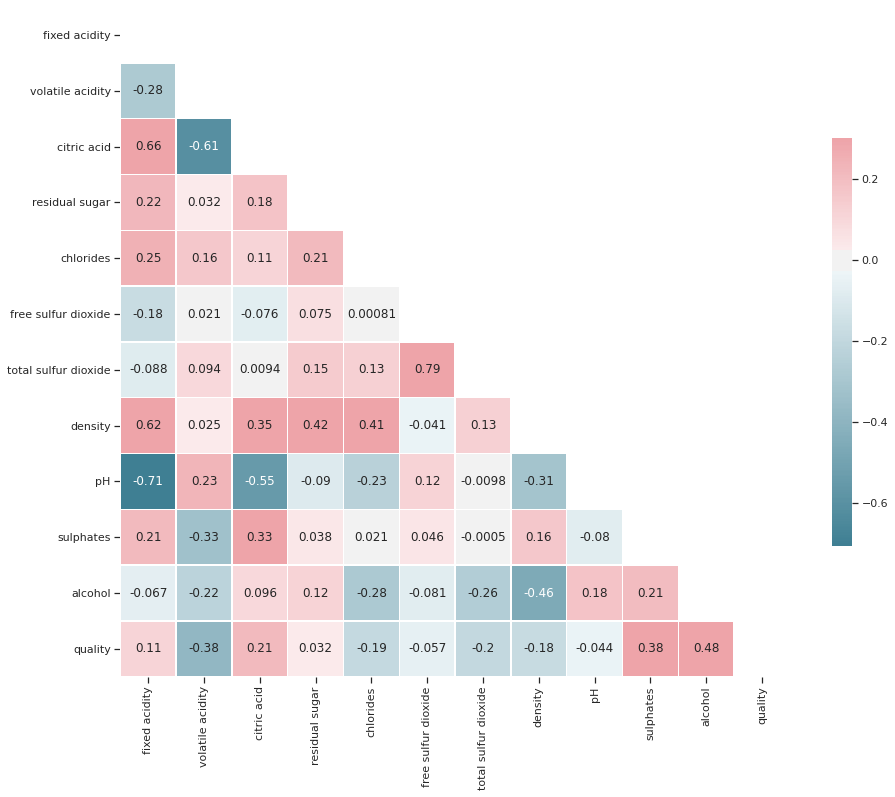

In [45]:
corr_data = data
corr = corr_data.corr(method="spearman")
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

For example, the correlation between chlorides and free sulfur dioxide is very low. It means, that btw features correlation is absent. On the next plot points should behave form as cloud if the correlation is calculated true.

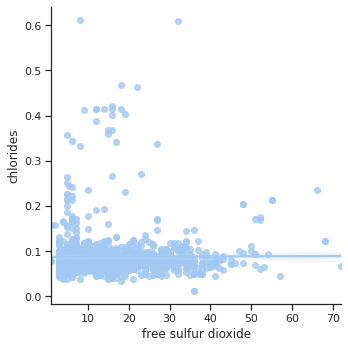

In [48]:
g = sns.lmplot(x="free sulfur dioxide", y="chlorides",
               height=5, data=data)

g.set_axis_labels("free sulfur dioxide", "chlorides")

Also, the correlation between fixed acidity and pH is high. It means, that features are correlated (linear). On the next plot points should behave form as a line if the correlation is calculated true.

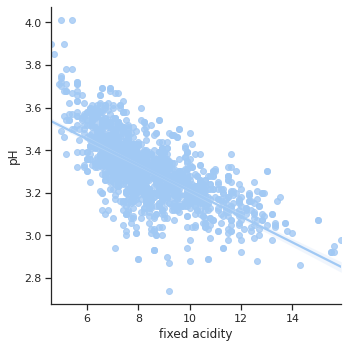

In [49]:
g = sns.lmplot(x="fixed acidity", y="pH",
               height=5, data=data)

g.set_axis_labels("fixed acidity", "pH")

## Inferential Statistics

* Sample Mean & Population Mean
* Confidence Intervals
** Calculating Confidence Intervals 
* Hypothesis Testing
** P-Value
** t-test
* Type I and Type II error


In [61]:
data = pd.read_csv('data/winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [57]:
data.shape

(1599, 12)

**Sample mean and Population mean**

Example for alcohol feature.

In [77]:
np.random.seed(0)
sample = np.random.choice(a=data['alcohol'], size=500) 
print("Sample mean:", sample.mean() )                       
print("Population mean:", data['alcohol'].mean()) 

Sample mean: 10.388266666666667
Population mean: 10.422983114446502


**Confidence Intervals**

In [81]:
sample_size = 200
sample = np.random.choice(a= data['alcohol'], size = sample_size)
sample_mean = sample.mean()
pop_stdev = data['alcohol'].std()

z_critical = stats.norm.ppf(q = 0.95) 
print("z-critical value: ",z_critical)                    

z-critical value:  1.6448536269514722


In [86]:
from statsmodels.stats.weightstats import _zconfint_generic, _tconfint_generic

# if we know std for population
z_conf = _zconfint_generic(sample_mean, 
                          pop_stdev, 
                          0.05, 'two-sided')
print( "95% confidence interval", z_conf )
# if we know only sample std
t_conf = _tconfint_generic(sample_mean, sample.std(),
                           sample_size - 1,
                           0.05, 'two-sided')
print ("95% confidence interval", t_conf)

95% confidence interval (8.190413253420552, 12.367753413246113)
95% confidence interval (8.27833552195953, 12.279831144707135)


In [93]:
print("True mean: {}".format(data['alcohol'].mean()))

True mean: 10.422983114446502


The confidence interval includes the value of the true mean

**Hypothesis Testing**

We see above some examples of hypothesis, now repeat them. 

Are wines alcohol with quality '5' really different from the quality of other?

In [95]:
from statsmodels.stats.weightstats import ztest

z_statistic, p_value = ztest(x1=data[data['quality'] == 5]['alcohol'], value=data['alcohol'].mean())
print('Z-statistic is :{}'.format(z_statistic))
print('P-value is :{}'.format(p_value))

Z-statistic is :-18.54043485660713
P-value is :9.743069449814216e-77


null hypothesis is rejected, bcs p_value < 0.05.

*Another way to test: Gosset's (Student's) t-test*

Now, let's also see if fixed acidity in wines with quality = 5 is different from the wines in the other qualities.

In [96]:
stats.ttest_1samp(a= data[data['quality'] == 5 ]['fixed acidity'],           
                 popmean= data['fixed acidity'].mean())

Ttest_1sampResult(statistic=-2.54259581404236, pvalue=0.011223823020502332)

null hypothesis is rejected, bcs p_value < 0.05.